### Import packages

In [1]:
library(cisTopic)

In [2]:
packageVersion("cisTopic")

[1] ‘0.2.1’

### Obtain Feature Matrix

In [3]:
start_time = Sys.time()

In [4]:
set.seed(2019)

In [5]:
metadata <- read.table('../../input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

In [6]:
head(metadata)

,label
BM1077-CLP-Frozen-160106-13,CLP
BM1077-CLP-Frozen-160106-14,CLP
BM1077-CLP-Frozen-160106-2,CLP
BM1077-CLP-Frozen-160106-21,CLP
BM1077-CLP-Frozen-160106-27,CLP
BM1077-CLP-Frozen-160106-3,CLP


In [7]:
pathToBams <- '../../input/sc-bams_nodup/'

In [8]:
bamFiles <- paste(pathToBams, list.files(pathToBams), sep='')

In [9]:
cellnames <- sapply(strsplit(basename(bamFiles),'.',fixed = TRUE), "[[", 1)
head(cellnames)

[1] "BM1077-CLP-Frozen-160106-13" "BM1077-CLP-Frozen-160106-14"
[3] "BM1077-CLP-Frozen-160106-2"  "BM1077-CLP-Frozen-160106-21"
[5] "BM1077-CLP-Frozen-160106-27" "BM1077-CLP-Frozen-160106-3"

In [10]:
sum(cellnames == rownames(metadata))

[1] 2034

In [11]:
ix = match(rownames(metadata),cellnames)
bamFiles = bamFiles[ix]
cellnames = cellnames[ix]

In [12]:
sum(cellnames == rownames(metadata))

[1] 2034

In [13]:
regions <- '../../input/combined.sorted.merged.bed'

In [ ]:
cisTopicObject <- createcisTopicObjectFromBAM(bamFiles, regions, project.name='buenrostro2018')
cisTopicObject <- renameCells(cisTopicObject, cellnames)

In [ ]:
cisTopicObject <- runModels(cisTopicObject, topic=c(10, 20, 25, 30, 35, 40), seed=987, nCores=10, burnin = 120, iterations = 150, addModels=FALSE)

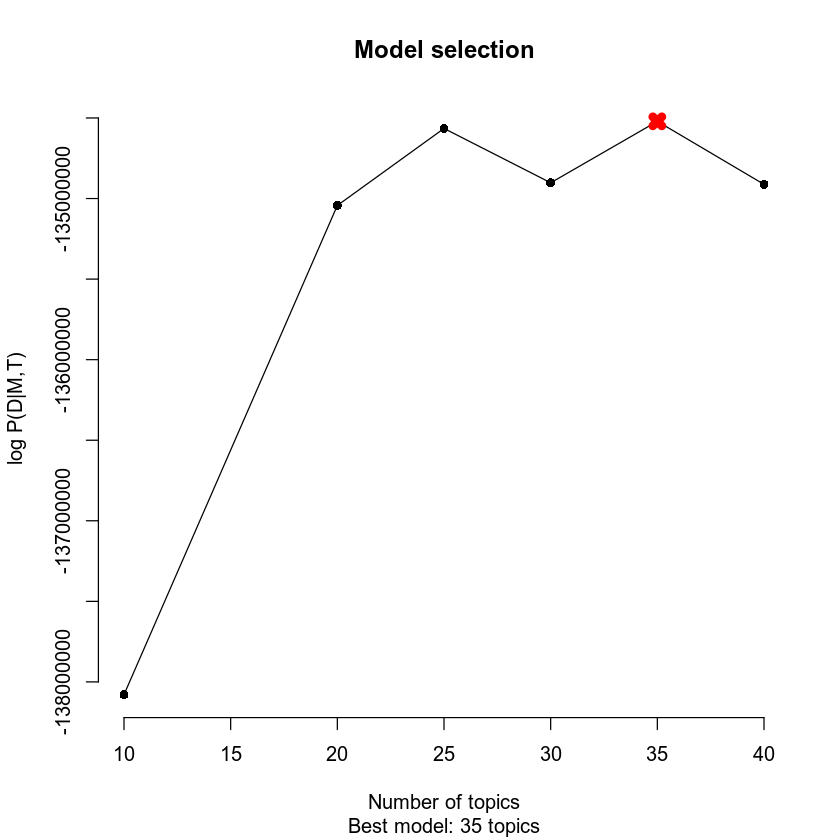

In [23]:
cisTopicObject <- selectModel(cisTopicObject)

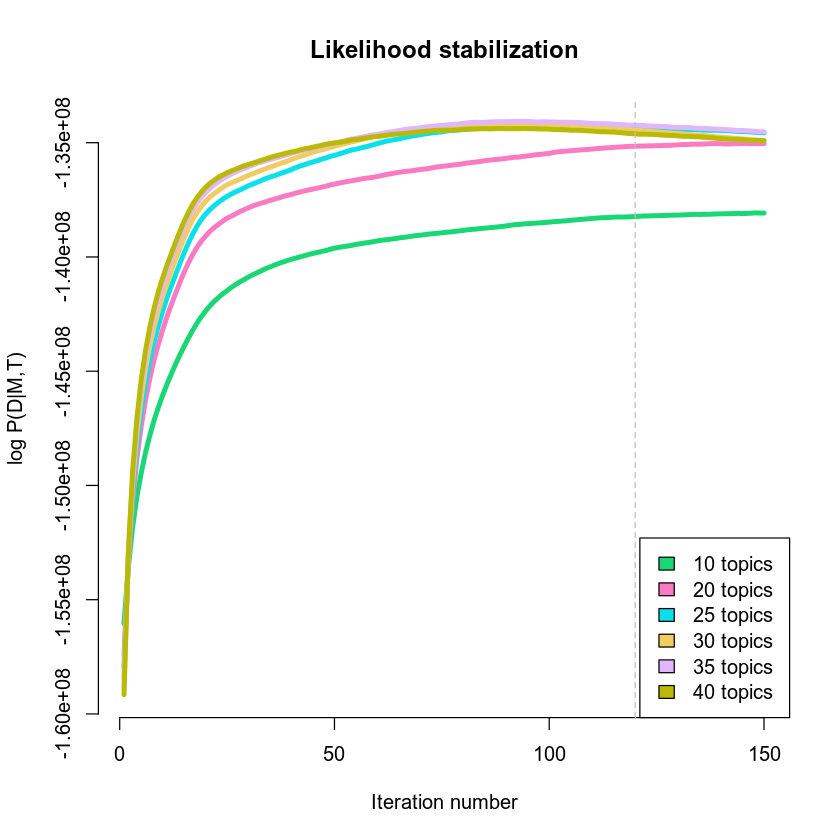

In [24]:
logLikelihoodByIter(cisTopicObject, select=c(10, 20, 25, 30, 35, 40))

In [ ]:
end_time <- Sys.time()

In [22]:
end_time - start_time

Time difference of 57.84311 mins

In [26]:
cellassign <- modelMatSelection(cisTopicObject, 'cell', 'Probability')
dim(cellassign)
cellassign[1:5,1:5]

[1]   35 2034

,BM1077-CLP-Frozen-160106-13,BM1077-CLP-Frozen-160106-14,BM1077-CLP-Frozen-160106-2,BM1077-CLP-Frozen-160106-21,BM1077-CLP-Frozen-160106-27
Topic1,0.042219723,0.007328581,0.014017728,0.02494824,0.100388487
Topic2,0.001274841,0.003112137,0.001030715,0.00320911,0.005209253
Topic3,0.013873266,0.113442425,0.058029272,0.03146998,0.033021367
Topic4,0.168203975,0.068467021,0.102762317,0.14886128,0.207928660
Topic5,0.149306337,0.094468427,0.080395795,0.08364389,0.094826064


In [27]:
sum(colnames(cellassign) == rownames(metadata))

[1] 2034

In [28]:
# colnames(cellassign) = rownames(metadata)
# cellassign[1:5,1:5]

In [29]:
saveRDS(cellassign, file = '../../output/feature_matrices/FM_cisTopic_buenrostro2018.rds')

### Downstream Analysis

In [30]:
cisTopicObject <- addCellMetadata(cisTopicObject, cell.data = metadata)

In [31]:
cisTopicObject <- runUmap(cisTopicObject, target='cell')

Loading required package: umap


Loading required package: plotly
Loading required package: ggplot2

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: scatterplot3d


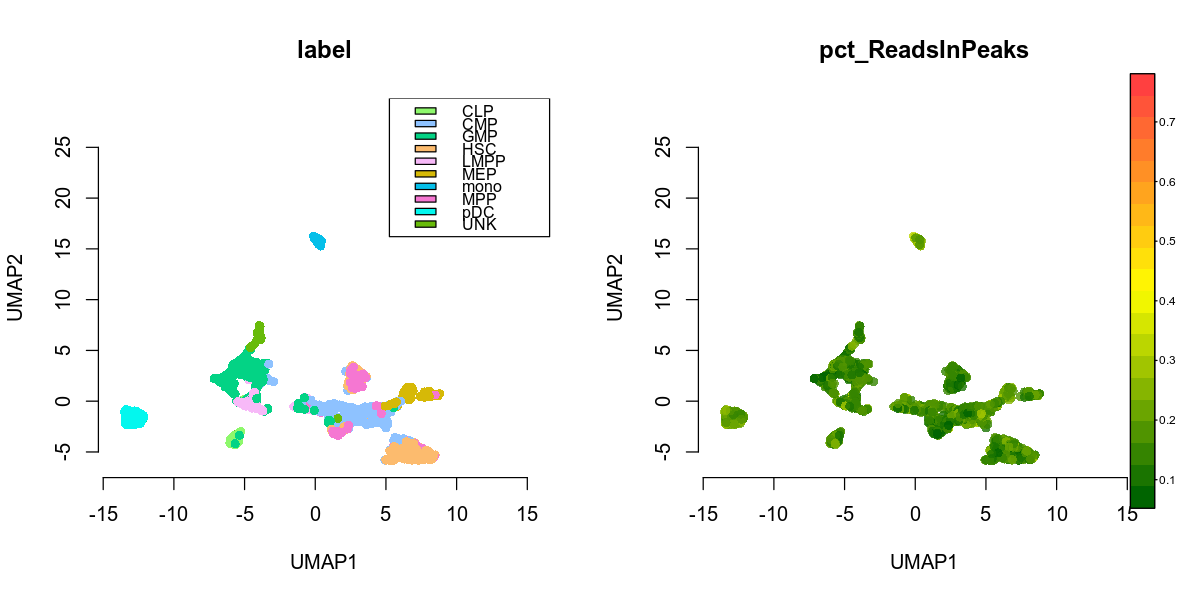

In [32]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plotFeatures(cisTopicObject, method='Umap', target='cell', topic_contr=NULL, colorBy=c('label','pct_ReadsInPeaks'), cex.legend = 0.8, factor.max=.75, dim=2, legend=TRUE, col.low='darkgreen', col.mid='yellow', col.high='brown1', intervals=20)

In [33]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_cisTopic/lib/R/lib/libRblas.so
LAPACK: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_cisTopic/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scatterplot3d_0.3-41 plotly_4.9.0         ggplot2_3.1.1       
[4] umap_0.2.0.0         Matrix_1.2-17        Rsubread_1.30.9     
[7] cisTopic_0.2.1       RevoUtils_11.0.1     RevoUtilsMath_11.0.0

loaded via a namespace (and not attached):
 [1] bitops_1.0-6                matrixStats_0.54.0         
 [3] bit64_0.9-7                 httr_1.4.0                 
 [5] GenomeInfoDb_1.16.0         repr_0.19.2                
 [7] tools_3.5.1                 R6_2.4.0                   
 [9] DBI_1.0.0                   BiocGenerics_

In [34]:
save.image(file = 'cisTopic_buenrostro2018.RData')